# Step 1: Data Cleaning

In [1]:
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv('stocks.csv', parse_dates=['Date'])

In [3]:
# Check for missing values
print(df.isnull().sum())

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
# Fill or drop missing values
df = df.dropna()

In [5]:
# Ensure date is datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Sort by date
df = df.sort_values('Date')

In [8]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
62,MSFT,2023-02-07,260.529999,268.769989,260.079987,267.559998,266.891510,50841400
186,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800
124,NFLX,2023-02-07,358.510010,364.179993,354.179993,362.950012,362.950012,6289400
187,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000


# Step 2: Trend Analysis

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

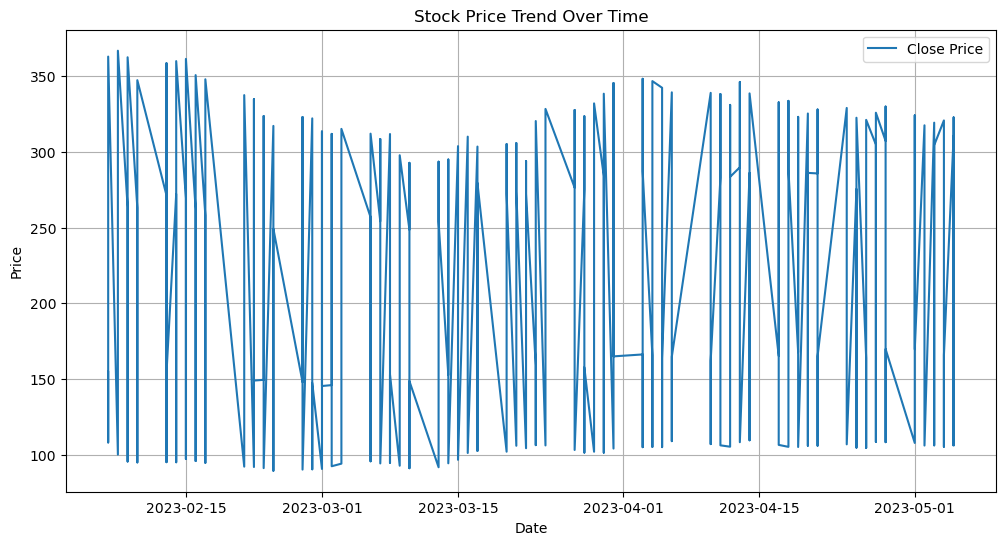

In [10]:
# Plot stock price trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Data Visualization

1. Line Chart: Daily & Monthly Stock Price Trends

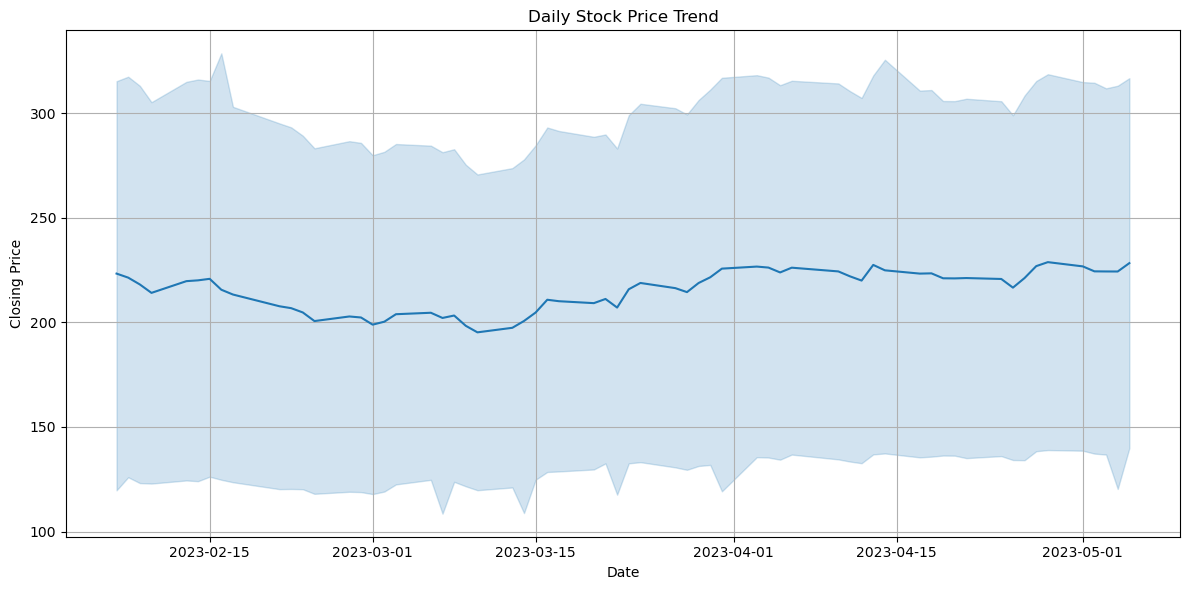

In [13]:
# --- Daily trend ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Daily Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

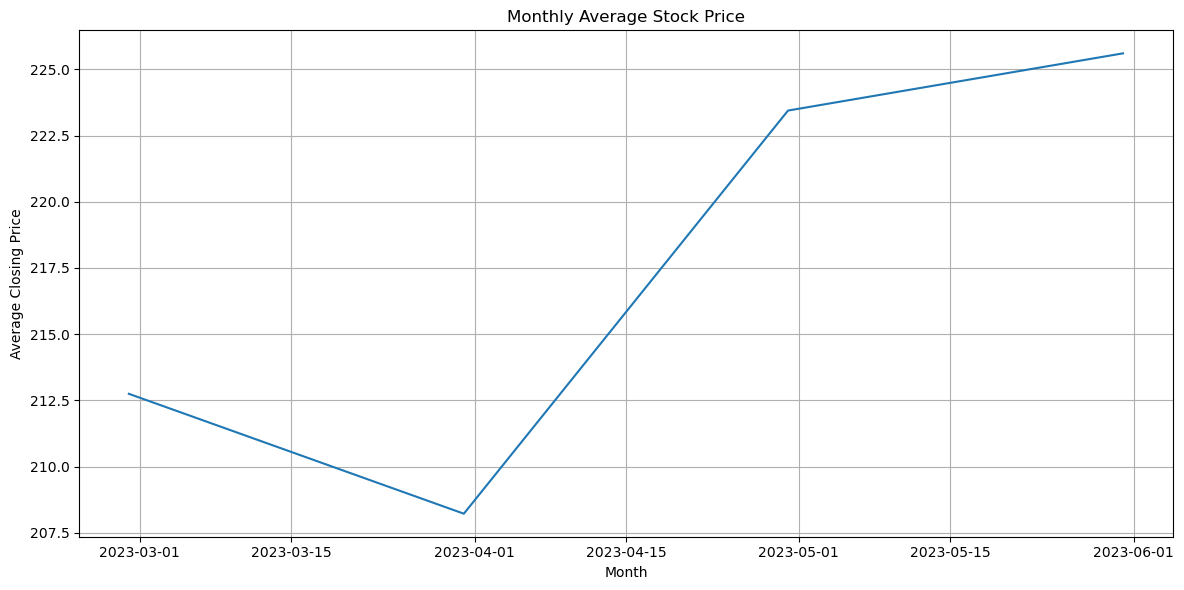

In [16]:
# --- Monthly trend ---
monthly_df = df.resample('M', on='Date').mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_df, x='Date', y='Close')
plt.title('Monthly Average Stock Price')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.tight_layout()
plt.show()

2. Bar Chart: Ticker or Date-wise Comparison

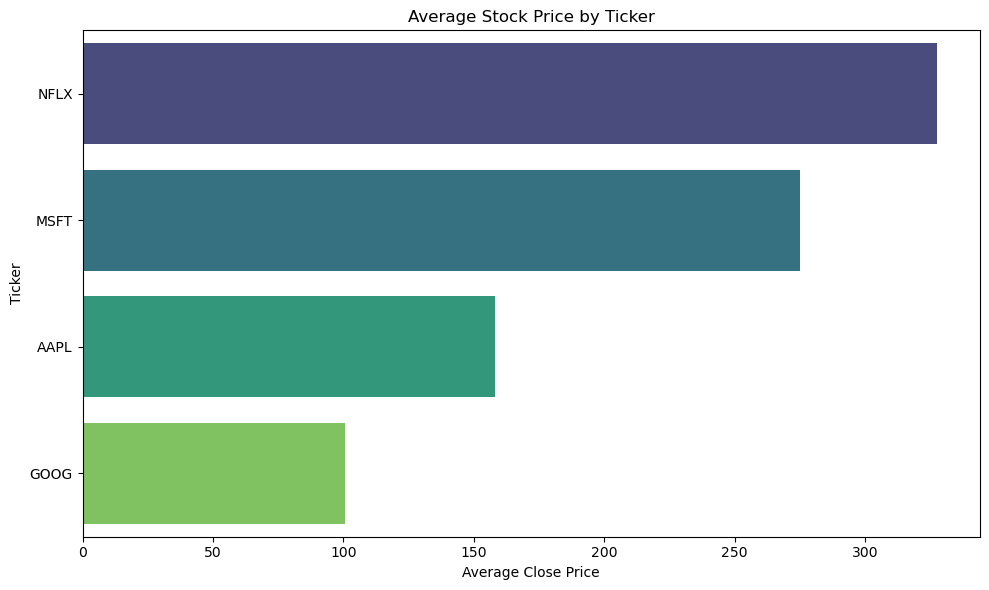

In [19]:
# Ticker-wise comparison
ticker_avg = df.groupby('Ticker')['Close'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=ticker_avg.values, y=ticker_avg.index, palette='viridis')
plt.title('Average Stock Price by Ticker')
plt.xlabel('Average Close Price')
plt.ylabel('Ticker')
plt.tight_layout()
plt.show()

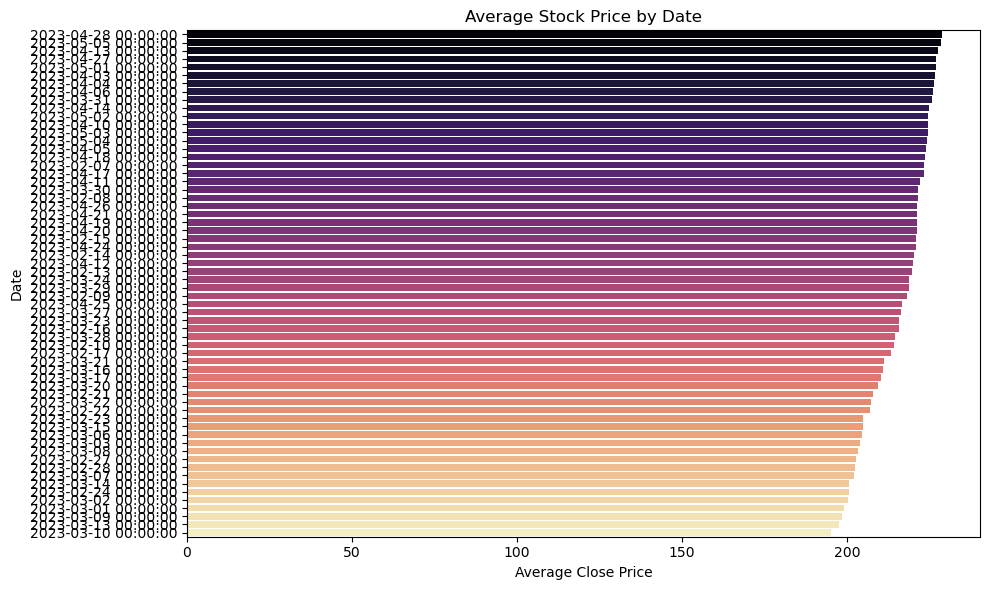

In [20]:
# Date-wise comparison (if Date exists)

date_avg = df.groupby('Date')['Close'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=date_avg.values, y=date_avg.index, palette='magma')
plt.title('Average Stock Price by Date')
plt.xlabel('Average Close Price')
plt.ylabel('Date')
plt.tight_layout()
plt.show()

3. Pie Chart: Revenue or Volume Distribution

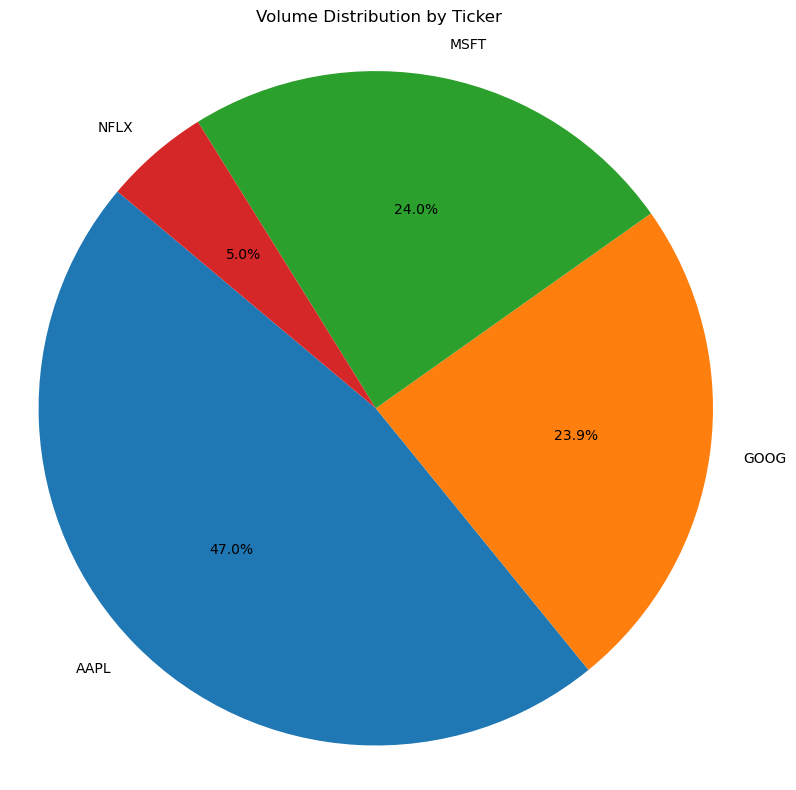

In [21]:
# Revenue/Profit Pie Chart
if 'Revenue' in df.columns:
    latest_df = df.sort_values('Date').drop_duplicates('Company', keep='last')  # use latest data per company
    revenue_by_company = latest_df.groupby('Company')['Revenue'].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(revenue_by_company, labels=revenue_by_company.index, autopct='%1.1f%%', startangle=140)
    plt.title('Revenue Distribution by Company')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

elif 'Volume' in df.columns:
    profit_by_company = df.groupby('Ticker')['Volume'].sum()

    plt.figure(figsize=(8, 8))
    plt.pie(profit_by_company, labels=profit_by_company.index, autopct='%1.1f%%', startangle=140)
    plt.title('Volume Distribution by Ticker')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Step 4: Forecasting

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [32]:
# Resample monthly average
monthly_df = df.set_index('Date').resample('M').mean()

In [33]:
model = ExponentialSmoothing(
    monthly_df['Close'],
    trend='add',
    seasonal=None  # <--- No seasonality
).fit()

In [34]:
# Forecast next 6 months
forecast = model.forecast(6)

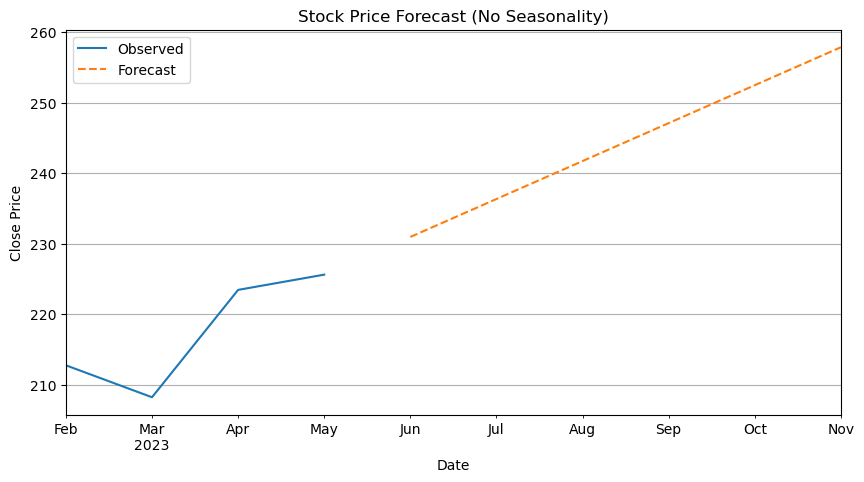

In [35]:
# Plot forecast
monthly_df['Close'].plot(label='Observed', figsize=(10, 5))
forecast.plot(label='Forecast', linestyle='--')
plt.title('Stock Price Forecast (No Seasonality)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()